In [1]:
import sys
sys.path.append("..")
from MPRA_predict.utils import *
from MPRA_predict.datasets import *
from MPRA_predict.metrics import *

In [2]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

In [3]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_epi_norm.csv')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,A549,HCT116,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_CTCF
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.014,-0.054,0.012,NaN,-0.709,1.386,2.063,1.868,1.566,1.225,1.827,1.603,1.333,1.134,1.738,1.171,1.208,1.076,2.014,1.676,1.396,0.886,1.952,1.559,1.342
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.042,0.183,0.094,NaN,-0.266,1.408,2.095,1.866,1.543,1.231,1.851,1.607,1.300,1.201,1.838,1.256,1.199,1.080,2.074,1.721,1.373,0.891,1.988,1.591,1.314
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.004,0.640,-0.188,NaN,0.619,0.428,0.468,0.047,0.242,1.231,1.236,1.085,0.644,-0.111,1.132,1.520,0.533,1.583,1.167,0.820,0.513,1.144,0.694,0.951,0.439
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.751,0.274,NaN,0.668,0.538,0.649,0.237,0.292,1.238,1.419,1.228,0.643,0.061,1.472,1.909,0.636,1.605,1.406,1.053,0.538,1.135,0.827,1.080,0.462
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.457,-0.645,0.061,NaN,-0.168,-0.900,-0.815,-0.628,-0.986,-0.987,-0.688,-0.799,-1.136,-1.086,-0.642,-0.376,-1.034,-1.133,-0.800,-0.735,-1.089,-0.985,-0.945,-0.740,-0.956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.708,1.294,1.077,NaN,NaN,2.335,2.768,2.025,1.701,2.188,2.653,1.884,1.501,3.210,3.555,2.518,2.075,2.388,3.118,2.803,1.672,2.150,3.154,2.291,1.409
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.547,-0.429,NaN,NaN,-0.439,-0.699,-0.556,-0.701,-0.477,-0.811,-0.667,-0.663,0.434,-0.690,-0.614,-0.350,-0.396,-0.853,-0.733,-0.638,-0.584,-0.885,-0.767,-0.700
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.146,-0.200,-0.310,NaN,NaN,0.030,-0.160,0.350,-0.132,0.555,0.219,0.730,0.256,0.583,0.169,1.307,0.353,1.262,0.911,1.405,0.309,0.869,0.180,0.969,0.098
760677,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,-0.119,-0.090,-0.387,NaN,NaN,0.130,-0.181,0.024,-0.370,-0.089,-0.368,-0.322,-0.222,1.671,-0.317,-0.035,0.272,0.068,-0.781,-0.523,-0.264,0.158,-0.410,-0.294,-0.416


In [4]:
pearson_df = pd.DataFrame(index=cell_types, columns=assays, dtype=float)
np.full(shape=(len(cell_types), len(assays)), fill_value=np.nan)

for i, cell_type in enumerate(cell_types):
    for j, assay in enumerate(assays):
        enhancer_activity = MPRA_df[cell_type]
        predicted_feature = MPRA_df[f'{cell_type}_{assay}']
        r, _ = pearson(predicted_feature, enhancer_activity)
        pearson_df.loc[cell_type, assay] = r
            
pearson_df

,DNase,H3K4me3,H3K27ac,CTCF
K562,0.535,0.483,0.464,0.400
HepG2,0.483,0.502,0.454,0.384
SK-N-SH,0.420,0.516,0.490,0.337
HCT116,0.483,0.500,0.499,0.376
A549,0.347,0.363,0.361,0.251


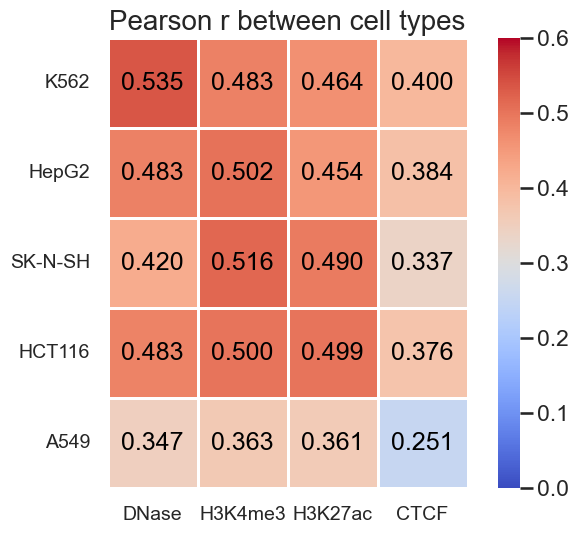

In [5]:
plt.figure(figsize=(8, 6), dpi=100)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.9, top=0.9)
sns.heatmap(
    pearson_df, square=True, linewidths=1, cmap='coolwarm', vmin=0, vmax=0.6, 
    annot=True, fmt='.3f', annot_kws={'fontsize': 18, 'color': 'black'})
plt.xticks(
    ticks=np.arange(len(assays))+0.5, labels=assays, 
    rotation=0, fontsize=14)
plt.yticks(
    ticks=np.arange(len(cell_types))+0.5, labels=cell_types, 
    rotation=0, fontsize=14)
plt.title(f'Pearson r between cell types', fontsize=20)
plt.savefig(f'figures/heatmap_pearson_r_epi_feature_vs_enhancer_activity.png', dpi=400)
plt.show()

In [6]:
# x_pos = np.arange(5).reshape(1,-1).repeat(4, axis=0)
# x_pos = x_pos + np.arange(0, 20, 6).reshape(-1,1)
# x_pos


# plt.figure(figsize=(16, 6), dpi=50)
# plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)

# for j, assay in enumerate(assays):
#     for i, cell_type in enumerate(cell_types):
#         y = pearson_df.loc[cell_type, assay]
#         plt.bar(x=x_pos[j, i], height=y, color=tab10_colors[i])

# plt.xticks(x_pos[:, 0], assays)
# plt.legend()
# plt.savefig(f'figures/bar_pearson.png')
# plt.show()

In [7]:
# for j, assay in enumerate(assays):
#     plt.figure(figsize=(8, 6), dpi=50)
#     plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
#     x = pearson_df.index
#     y = pearson_df[assay]
#     plt.bar(x, y, color=tab10_colors[:5])
#     plt.xlabel('Cell types')
#     plt.ylabel('Pearson correlation')
#     plt.legend()
#     plt.savefig(f'figures/bar_pearson_{assay}.png')
#     plt.show()

In [8]:
data_split_dict = {}
data_split_dict['total'] = np.ones(len(MPRA_df), dtype=bool)

data_split_dict['chrom'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(1, 23)) + ['X', 'Y'])])
data_split_dict['designed'] = ~data_split_dict['chrom']

data_split_dict['train'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(3, 23)) + ['X', 'Y'])])
data_split_dict['valid'] = MPRA_df['chr'].isin(['chr1'])
data_split_dict['test'] = MPRA_df['chr'].isin(['chr2'])

data_split_dict['ref'] = (MPRA_df['allele'] == 'ref') | (MPRA_df['allele'].isna())
data_split_dict['alt'] = MPRA_df['allele'] == 'alt'



stds = MPRA_df[cell_types].std(axis=1, skipna=True)
threshold = np.percentile(stds.dropna(), 95)
data_split_dict['diff'] = (stds > threshold)
data_split_dict['const'] = ~data_split_dict['diff']

# MPRA_df['diff'] = (MPRA_df[cell_types].max(axis=1) - MPRA_df[cell_types].min(axis=1)) > 1
# data_split_dict['const'] = ~MPRA_df['diff']
# data_split_dict['diff']  = MPRA_df['diff']

for key in data_split_dict:
    print(key, data_split_dict[key].sum())

keys = list(data_split_dict.keys())
for k1 in keys:
    for k2 in keys:
        data_split_dict[f'{k1}_{k2}'] = data_split_dict[k1] & data_split_dict[k2]

total 760679
chrom 760679
designed 0
train 631073
valid 70952
test 58654
ref 389266
alt 371413
diff 38034
const 722645


In [9]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

for assay in assays:
    for data_split in ['total', 'const', 'diff',]:
        cell_types_assay = [f'{cell_type}_{assay}' for cell_type in cell_types]
        r_array = pd.DataFrame(index=cell_types, columns=cell_types_assay)
        for cell_type in cell_types:
            for cell_type_assay in cell_types_assay:
                condition = data_split_dict[data_split]
                df = MPRA_df[condition]
                x, y = np.array(df[f'{cell_type}']), np.array(df[f'{cell_type_assay}'])
                r, p = pearson(x, y)
                r_array.loc[cell_type, cell_type_assay] = r
        print(data_split)
        print(r_array)
        print()

total
        K562_DNase HepG2_DNase SK-N-SH_DNase HCT116_DNase A549_DNase
K562         0.535       0.400         0.410        0.445      0.427
HepG2        0.522       0.483         0.451        0.482      0.476
SK-N-SH      0.468       0.384         0.420        0.420      0.415
HCT116       0.492       0.431         0.437        0.483      0.454
A549         0.362       0.302         0.280        0.363      0.347

const
        K562_DNase HepG2_DNase SK-N-SH_DNase HCT116_DNase A549_DNase
K562         0.509       0.388         0.397        0.432      0.415
HepG2        0.507       0.451         0.435        0.455      0.444
SK-N-SH      0.466       0.378         0.415        0.405      0.400
HCT116       0.481       0.414         0.425        0.459      0.433
A549         0.332       0.266         0.253        0.316      0.299

diff
        K562_DNase HepG2_DNase SK-N-SH_DNase HCT116_DNase A549_DNase
K562         0.579       0.312         0.395        0.367      0.333
HepG2        0.

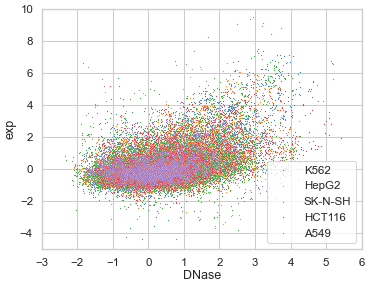

In [14]:
plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
handles = []
for i, cell_type in enumerate(cell_types):
    x = MPRA_df[f'{cell_type}_DNase'][:10000]
    y = MPRA_df[f'{cell_type}'][:10000]
    sns.scatterplot(x=x, y=y, s=3, color=tab10_colors[i], label=cell_type)
    handles.append(mpatches.Patch(color=tab10_colors[i], label=cell_type))
plt.xlim(-3, 6)
plt.ylim(-5, 10)
plt.xlabel('DNase')
plt.ylabel('exp')
plt.legend(loc="lower right")
plt.savefig('figures/DNase_exp', dpi=400)
plt.show()

In [15]:
plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
handles = []
for i, cell_type in enumerate(cell_types):
    x = MPRA_df[f'{cell_type}_DNase'][:10000]
    y = MPRA_df[f'{cell_type}'][:10000]
    sns.kdeplot(x=x, y=y, color=tab10_colors[i], label=cell_type, levels=5)
    handles.append(mpatches.Patch(color=tab10_colors[i], label=cell_type))
plt.xlabel('DNase')
plt.ylabel('exp')
plt.legend(handles=handles, loc="lower right") 
plt.savefig('figures/kde_dnase_exp.png', dpi=400)
plt.show()

In [ ]:
# cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
# assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

# for assay in assays:
#     for i, cell_type in enumerate(cell_types):
#         df = MPRA_df
#         x = np.array(df[f'{cell_type}_{assay}'])
#         y = np.array(df[f'{cell_type}'])
#         r, _ = pearson(x, y)
#         r2, _ = spearman(x, y)
#         print('r', r)

#         fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6), dpi=100)
#         plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
#         sns.scatterplot(x=x, y=y, s=1, color=tab10_colors[i], alpha=0.2)
#         sns.kdeplot(x=x[:10000], y=y[:10000], levels=5, color=tab10_colors[i])
#         plt.xlim(-4, 6)
#         plt.ylim(-4, 8)
#         plt.text(x=0.1, y=0.8, s=f'Pearson correlation = {r:.3f} \nSpearman correlation = {r2:.3f} \nn = {len(x)}', 
#                  fontsize=16, transform=plt.gca().transAxes)
#         plt.xlabel(f'{cell_type} {assay}')
#         plt.ylabel(f'{cell_type} enhancer activity')
#         plt.title(f'{cell_type} {assay} vs {cell_type} enhancer activity')
#         plt.savefig(f'figures/kde_{cell_type}_{assay}_enhancer_activity.png', dpi=400)
#         plt.show()

r 0.5352375209411965


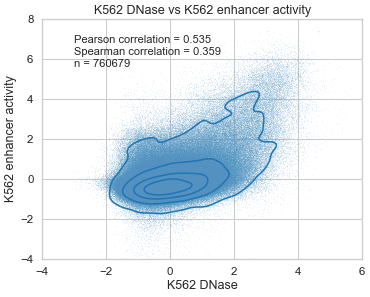

r 0.48319543498089995


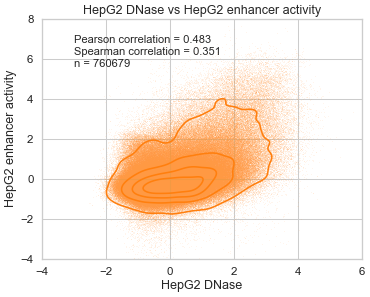

r 0.4197628833312424


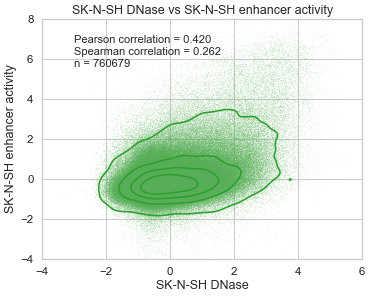

r 0.4828109684023385


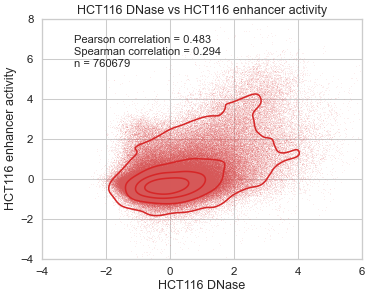

r 0.3471836031925962


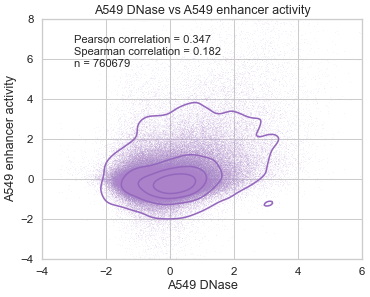

r 0.4833727480976475


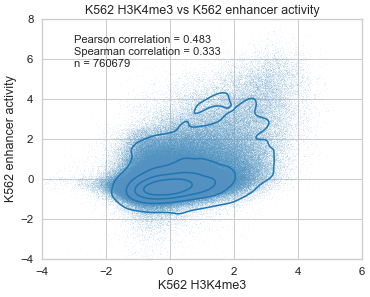

r 0.5017476597240651


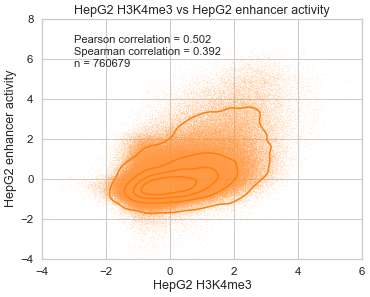

r 0.5159801275685104


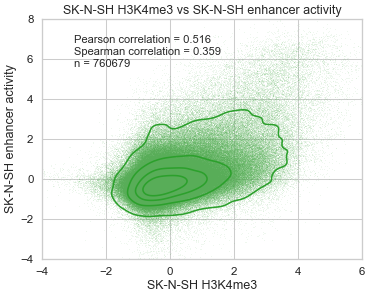

r 0.4995240801166687


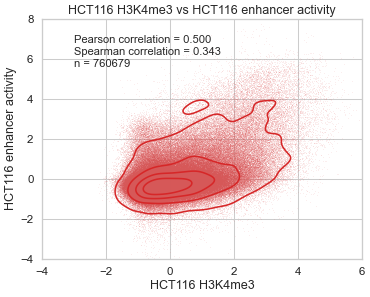

r 0.36340933857620883


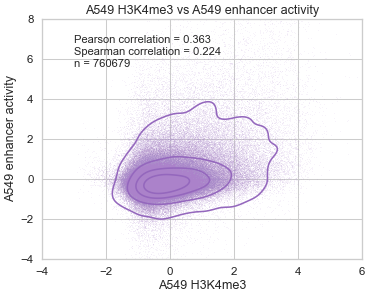

r 0.4636319051891894


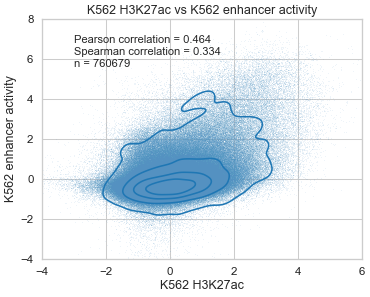

r 0.4543275262793896


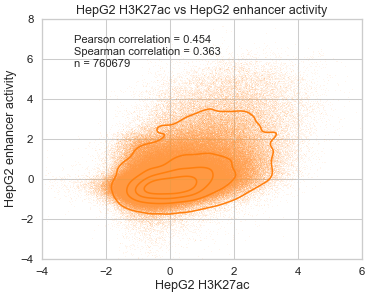

r 0.49006481885632763


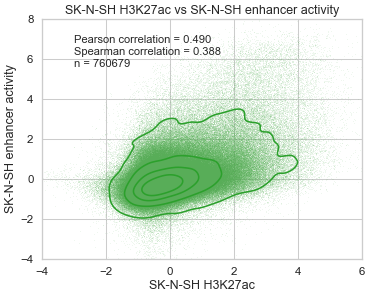

r 0.4994942682720591


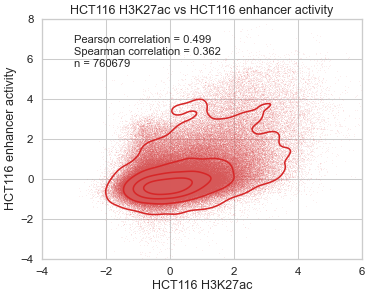

r 0.36059076833742204


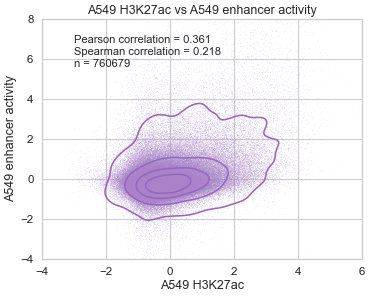

r 0.4000615419944499


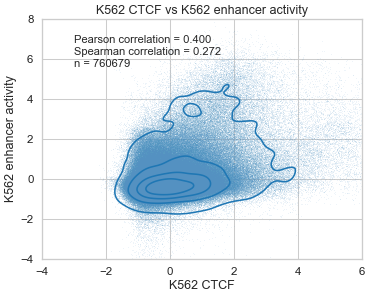

r 0.3835163316411166


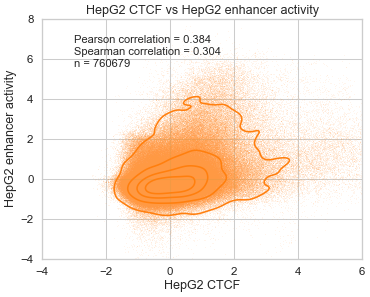

r 0.3371924918125062


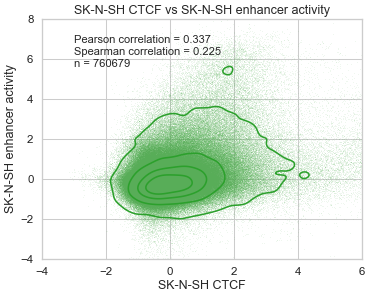

r 0.37620764288530195


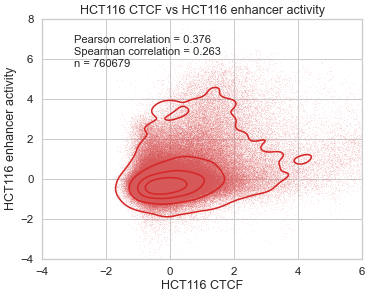

r 0.2508200445331447


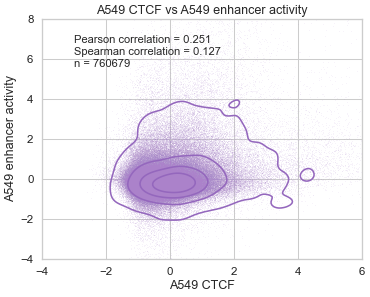

In [10]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

for assay in assays:
    for i, cell_type in enumerate(cell_types):
        df = MPRA_df
        x = np.array(df[f'{cell_type}_{assay}'])
        y = np.array(df[f'{cell_type}'])
        r, _ = pearson(x, y)
        r2, _ = spearman(x, y)
        print('r', r)

        plt.figure(figsize=(8, 6), dpi=50)
        plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
        sns.scatterplot(x=x, y=y, s=1, color=tab10_colors[i], alpha=0.2)
        sns.kdeplot(x=x[:10000], y=y[:10000], levels=5, color=tab10_colors[i])
        plt.xlim(-4, 6)
        plt.ylim(-4, 8)
        plt.text(x=0.1, y=0.8, s=f'Pearson correlation = {r:.3f} \nSpearman correlation = {r2:.3f} \nn = {len(x)}', 
                 fontsize=16, transform=plt.gca().transAxes)
        plt.xlabel(f'{cell_type} {assay}')
        plt.ylabel(f'{cell_type} enhancer activity')
        plt.title(f'{cell_type} {assay} vs {cell_type} enhancer activity')
        plt.savefig(f'figures/kde_{cell_type}_{assay}_enhancer_activity.png', dpi=400)
        plt.show()

0.30557501592262504


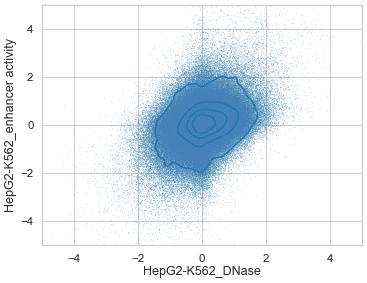

0.5386580828044245


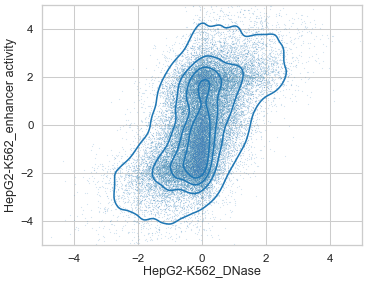

In [15]:
for assay in ['DNase']:
    for data_split in ['total', 'diff']:
        df = MPRA_df[data_split_dict[data_split]]
        x = np.array(df[f'HepG2_{assay}']) - np.array(df[f'K562_{assay}'])
        y = np.array(df[f'HepG2']) - np.array(df[f'K562'])
        r, p = pearson(x, y)
        print(r)

        plt.figure(figsize=(8, 6), dpi=50)
        plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
        sns.scatterplot(x=x, y=y, s=3, color=tab10_colors[0], alpha=0.2)
        sns.kdeplot(x=x[:10000], y=y[:10000], levels=5, color=tab10_colors[0])
        plt.xlim(-5, 5)
        plt.ylim(-5, 5)
        plt.xlabel(f'HepG2-K562_{assay}')
        plt.ylabel(f'HepG2-K562_enhancer activity')
        plt.savefig(f'figures/kde_HepG2-K562_{assay}_exp_{data_split}.png', dpi=400)
        plt.show()

0.5276681986770394


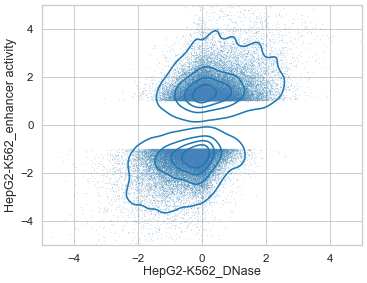

In [16]:
for assay in ['DNase']:
    for data_split in ['diff']:
        condition = (MPRA_df['HepG2'] - MPRA_df[f'K562']).abs() > 1
        df = MPRA_df[condition]
        x = np.array(df[f'HepG2_{assay}']) - np.array(df[f'K562_{assay}'])
        y = np.array(df[f'HepG2']) - np.array(df[f'K562'])
        r, p = pearson(x, y)
        print(r)

        plt.figure(figsize=(8, 6), dpi=50)
        plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
        sns.scatterplot(x=x, y=y, s=3, color=tab10_colors[0], alpha=0.2)
        sns.kdeplot(x=x[:10000], y=y[:10000], levels=5, color=tab10_colors[0])
        plt.xlim(-5, 5)
        plt.ylim(-5, 5)
        plt.xlabel(f'HepG2-K562_{assay}')
        plt.ylabel(f'HepG2-K562_enhancer activity')
        plt.savefig(f'figures/kde_HepG2-K562_{assay}_exp_{data_split}.png', dpi=400)
        plt.show()

In [ ]:
# overall corr

cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

df_list = []
for i, cell_type in enumerate(cell_types):
    df = MPRA_df[['description', 'seq', 'chr', 'is_ref', 'pos', 'ref', 'alt', 'start', 'end']].copy()
    df['cell_type'] = cell_type
    df['exp'] = MPRA_df[cell_type]
    for j, assay in enumerate(assays):
        df[assay] = MPRA_df[f'{cell_type}_{assay}']
        df_list.append(df)

MPRA_df_concat = pd.concat(df_list, axis=0)
MPRA_df_concat

In [ ]:
for j, assay in enumerate(assays):
    x = np.array(MPRA_df_concat['exp'])
    y = np.array(MPRA_df_concat[assay])
    r, p = pearson(x, y)
    print(f'{assay}: {r}')

In [ ]:
for j, assay in enumerate(assays):
    x = np.array(MPRA_df_concat['exp'])
    y = np.array(MPRA_df_concat[assay])
    r, p = pearson(x, y)
    print(f'overall corr {assay}: {r}')

    plt.figure(figsize=(8, 6), dpi=50)
    plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
    handles = []
    for i, cell_type in enumerate(cell_types):
        x = MPRA_df[f'{cell_type}_{assay}'][:10000]
        y = MPRA_df[f'{cell_type}'][:10000]
        sns.scatterplot(x=x, y=y, s=1, color=tab10_colors[i], alpha=0.2)
        sns.kdeplot(x=x, y=y, levels=5, color=tab10_colors[i])
        handles.append(mpatches.Patch(color=tab10_colors[i], label=cell_type))
    plt.xlim(-3, 6)
    plt.ylim(-3, 6)
    plt.xlabel(f'{assay}')
    plt.ylabel(f'enhancer activity')
    plt.text(
        x=0.1, y=0.8, s=f'Overall Pearson correlation = {r:.3f} \nn = {len(MPRA_df_concat)}', 
        fontsize=16, transform=plt.gca().transAxes)
    plt.legend(handles=handles, loc="lower right") 
    plt.savefig(f'figures/kde_scatter_overall_{assay}_enhancer_activity.png', dpi=400)
    plt.show()

In [ ]:
# plt.figure(figsize=(8, 6), dpi=50)
# plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
# handles = []
# for i, cell_type in enumerate(cell_types):
#     x = MPRA_df[f'{cell_type}_DNase'][:100000]
#     y = MPRA_df[f'{cell_type}'][:100000]
#     sns.kdeplot(x=x, y=y, color=tab10_colors[i], label=cell_type, levels=5)
#     handles.append(mpatches.Patch(color=tab10_colors[i], label=cell_type))
# plt.xlabel('DNase')
# plt.ylabel('exp')
# plt.legend(handles=handles, loc="lower right") 
# plt.savefig('figures/kde_dnase_exp.png', dpi=400)
# plt.show()

In [ ]:
# 每条序列在不同细胞类型之间的相关系数，5v5的pearson

x = np.array(MPRA_df[cell_types])
y = np.array(MPRA_df[[f'{cell_type}_DNase' for cell_type in cell_types]])
print(x.shape, y.shape)

pearson_r_per_seq = []
for i in tqdm(range(len(x))):
    x_i, y_i = remove_nan(x[i], y[i])
    if len(x_i) >= 2:
        r, p = pearsonr(x_i, y_i)
    else:
        r = np.nan
    pearson_r_per_seq.append(r)
print(pearson_r_per_seq)

In [ ]:
pearson_r_per_seq = np.array(pearson_r_per_seq)
np.save('pearson_r_per_seq.npy', pearson_r_per_seq)

In [ ]:
pearson_r_per_seq = np.load('pearson_r_per_seq.npy')
pearson_r_per_seq.shape

In [ ]:
print(np.nanmean(pearson_r_per_seq))

In [ ]:
plt.figure(figsize=(8, 6), dpi=50)
plt.subplots_adjust(left=0.15, bottom=0.15, right=0.95, top=0.95)
sns.histplot(pearson_r_per_seq)
plt.xlabel(f'Pearson R per seq')
plt.ylabel(f'Count')
# plt.savefig(f'figures/scatter_HepG2-K562_{assay}_exp.png', dpi=400)
plt.savefig(f'figures/hist_pearson_per_seq.png', dpi=400)
plt.show()